In [1]:
! pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 1.5 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 1.4 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.2 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.2 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 1.1 MB/s eta 0:00:02
     -------------------- ------------------- 1.6/3.0 MB 1.1 MB/s eta 0:00:02
     ------------------------ --------------- 1.8/3.0 MB 1.1 MB/s eta 0:00:02
     ------------------------ --------------- 1.8/3.0 MB 1.1 MB/s eta 0:00:02
     ------------------------------- -------- 2.4/3.0 MB 1.1 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 1.1 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 1.1 MB/s eta 0:00:01


In [2]:
import yfinance as y 
import pandas as pd 
import numpy as np 


In [3]:
""" Description: Use historical market data to construct an optimized investment portfolio using Modern Portfolio Theory (MPT) or the Capital Asset Pricing Model (CAPM).

    Skills Highlighted: Data analysis (Python/R), risk management, quantitative modeling.""" 

' Description: Use historical market data to construct an optimized investment portfolio using Modern Portfolio Theory (MPT) or the Capital Asset Pricing Model (CAPM).\n\n    Skills Highlighted: Data analysis (Python/R), risk management, quantitative modeling.'

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

from scipy.optimize import minimize

# Step 1: Data Collection
# Define the tickers of the assets in your portfolio
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Download historical data
data = yf.download(tickers = tickers, start = '2020-03-10',end = '2025-03-11', prepost = True,  progress=False)['Close']
data.head()

# Step 2: Calculate daily returns


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2020-03-10,69.246025,94.591003,63.455124,154.029190,43.021999
2020-03-11,66.841080,91.042999,60.256912,147.051376,42.282001
2020-03-12,60.240219,83.830498,55.313049,133.105286,37.369999
2020-03-13,67.457481,89.250000,60.424614,152.028671,36.441334
2020-03-16,58.779289,84.457497,53.394722,129.621124,29.671333


In [12]:
data.columns

Index(['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA'], dtype='object', name='Ticker')

Optimal Weights:  [5.74545937e-01 3.59955121e-17 2.01928071e-01 0.00000000e+00
 2.23525992e-01]
Expected Portfolio Return:  0.3354575894216286
Portfolio Volatility:  0.32330658574110877


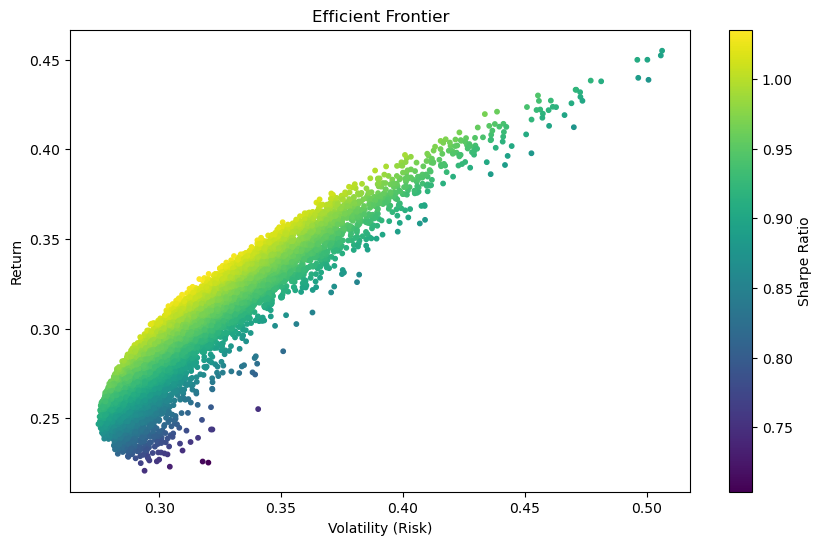

In [13]:
returns = data.pct_change().dropna()

# Step 3: Calculate expected returns and covariance matrix
expected_returns = returns.mean() * 252  # Annualize the expected returns (252 trading days)
cov_matrix = returns.cov() * 252  # Annualize the covariance matrix

# Step 4: Define portfolio performance functions
def portfolio_return(weights):
    return np.sum(weights * expected_returns)

def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def negative_sharpe_ratio(weights):
    port_return = portfolio_return(weights)
    port_volatility = portfolio_volatility(weights)
    return -(port_return / port_volatility)  # Negative for minimization

# Step 5: Constraints and optimization
def check_sum(weights):
    return np.sum(weights) - 1  # Sum of weights must be 1

# Initial guess (equal distribution of weights)
init_guess = [1. / len(tickers)] * len(tickers)

# Bounds for the weights (0 <= weight <= 1 for each asset)
bounds = tuple((0, 1) for _ in range(len(tickers)))

# Constraints dictionary
constraints = {'type': 'eq', 'fun': check_sum}

# Optimize the portfolio to maximize the Sharpe Ratio
result = minimize(negative_sharpe_ratio, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Step 6: Display the results
optimal_weights = result.x
portfolio_return_optimal = portfolio_return(optimal_weights)
portfolio_volatility_optimal = portfolio_volatility(optimal_weights)

print("Optimal Weights: ", optimal_weights)
print("Expected Portfolio Return: ", portfolio_return_optimal)
print("Portfolio Volatility: ", portfolio_volatility_optimal)

# Step 7: Visualize the Efficient Frontier
# Generate random portfolios for visualization
n_portfolios = 10000
portfolio_returns = []
portfolio_volatilities = []
portfolio_sharpe_ratios = []

for _ in range(n_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_returns.append(portfolio_return(weights))
    portfolio_volatilities.append(portfolio_volatility(weights))
    portfolio_sharpe_ratios.append(portfolio_returns[-1] / portfolio_volatilities[-1])

# Create DataFrame to store results
portfolio_data = pd.DataFrame({
    'Return': portfolio_returns,
    'Volatility': portfolio_volatilities,
    'Sharpe Ratio': portfolio_sharpe_ratios
})

# Plot Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_data['Volatility'], portfolio_data['Return'], c=portfolio_data['Sharpe Ratio'], cmap='viridis', marker='o', s=10)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()


In [14]:
data.columns


Index(['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA'], dtype='object', name='Ticker')

C:\Users\hp\AppData\Local\Temp\ipykernel_2900\2454012790.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['AAPL'].resample('M').last().plot()


<Axes: xlabel='Date'>

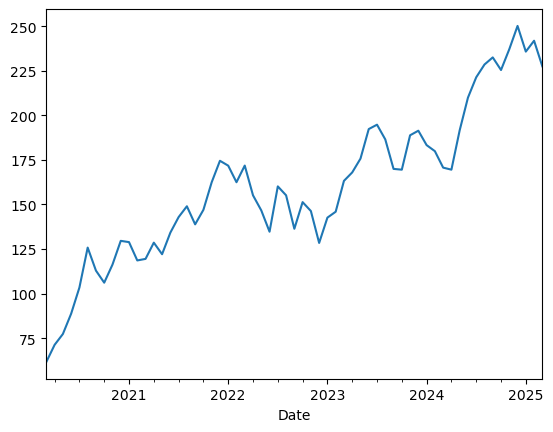

In [18]:
data['AAPL'].resample('M').last().plot() 

C:\Users\hp\AppData\Local\Temp\ipykernel_2900\912174285.py:2: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data[str(i)].resample('w').last().plot()
C:\Users\hp\AppData\Local\Temp\ipykernel_2900\912174285.py:2: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data[str(i)].resample('w').last().plot()
C:\Users\hp\AppData\Local\Temp\ipykernel_2900\912174285.py:2: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data[str(i)].resample('w').last().plot()
C:\Users\hp\AppData\Local\Temp\ipykernel_2900\912174285.py:2: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data[str(i)].resample('w').last().plot()
C:\Users\hp\AppData\Local\Temp\ipykernel_2900\912174285.py:2: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data[str(i)].resample('w')

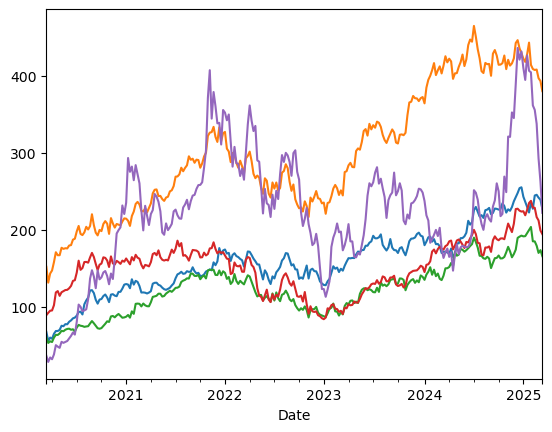

In [19]:
for i in tickers : 
    data[str(i)].resample('w').last().plot()